<a href="https://colab.research.google.com/github/danielmrios/Methodologies-of-Data-Science/blob/main/weather_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

##### $\rightarrow$ Provide a brief introduction to the purpose of this notebook.

This notebook is the analysis portion of investigating wether it rains more in NYC or Seattle

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/danielmrios/Methodologies-of-Data-Science/main/Seattle-Weather/clean_seattle_nyc_weather.csv')

##### $\rightarrow$ Review the contents of the data set.

In [4]:
df

,date,city,precipitation
0,2020-01-01,Seattle,0.138000
1,2020-01-02,Seattle,0.290000
2,2020-01-03,Seattle,0.276000
3,2020-01-04,Seattle,0.125000
4,2020-01-05,Seattle,0.187500
...,...,...,...
2917,2023-12-27,NYC,0.085714
2918,2023-12-28,NYC,1.778571
2919,2023-12-29,NYC,0.078571
2920,2023-12-30,NYC,0.001429


Looks good.

Let's make we have the right number of columns and rows.

There should be 3 columns and 2(4 x 365 + 1) = 2922 rows

In [5]:
df.shape

(2922, 3)

Yep

Check data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2922 non-null   object 
 1   city           2922 non-null   object 
 2   precipitation  2921 non-null   float64
dtypes: float64(1), object(2)
memory usage: 68.6+ KB


Looks like date isn't in datetime form

In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2922 non-null   datetime64[ns]
 1   city           2922 non-null   object        
 2   precipitation  2921 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ KB


Fixed

# The Question

My family thinks that it rains too much in Seattle, and refuses to visit me.

We will use the data science methodology to investigate whether it rains more in Seattle, WA than in New York City, NY. We’ll use data to determine whether this is true or not.

# Analysis

## The core question


At the core of the question is measuring how much it rains in Seattle, how much it rains in New York, and which is more.

Let's start by taking a high level look, the average amount of rain per day each city had

In [9]:
df.groupby(by='city').describe()

date                                                                 \
        count                 mean                  min                  25%   
city                                                                           
NYC      1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   
Seattle  1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   

                                                                             \
                         50%                  75%                  max  std   
city                                                                          
NYC      2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   
Seattle  2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   

        precipitation                                                  \
                count      mean  min  25%       50%     75%       max   
city                                                                    
NYC            1461.0  0.126679  0.0  0.0  0.010000  0.1300  3.191429   
Seattle        1460.0  0.116238  0.0  0.0  0.016667  0.1385  2.710000   

                   
              std  
city               
NYC      0.281472  
Seattle  0.228500

Looks like it actually rained more in NY than Seattle, by an average of 0.01 inches per day

Let's see what this number looks like per year for a better scope

In [10]:
# create a year column
df['year'] = df['date'].dt.year

In [11]:
# Now, group by 'city' and 'year' and calculate the sum of precipitation
yearavg = df.groupby(['city', 'year'])['precipitation'].sum()

yearavg.groupby(by='city').describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
NYC,4.0,46.269482,5.669579,39.526881,42.708720,46.829500,50.390262,51.892048
Seattle,4.0,42.427000,2.562014,38.814833,41.507083,43.255417,44.175333,44.382333


NYC is seeing about 4 inches more per year on average from 2020-2024.

It also has much greater variability year over year as seen with its min/max and standard deviation.

Does it rain more in Seattle than NY? Purely by precipitation, it does not.

## Exploring further

As characterized here, there's more to explore about the question. Humans aren't affected or make decisions around rain purely by measuring the average precipitation over a year, there are a number of more angles to consider.

##### $\rightarrow$ What does a rainy day usually look like in each city?

Let's see how each city experiences a rainy day using a histogram.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log(rain)')

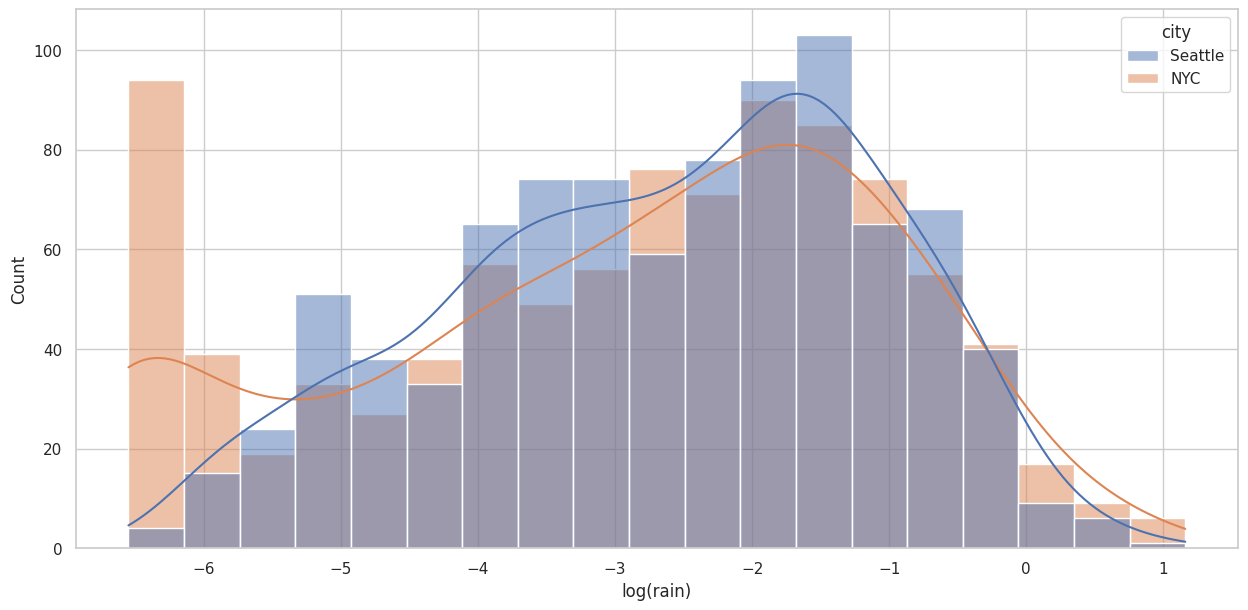

In [12]:
df["log_precip"] = np.log(df["precipitation"])
plt.figure(figsize=(15, 7))
h = sns.histplot(data=df, x="log_precip", hue="city", bins="auto", kde=True)
plt.xlabel("log(rain)")

NYC has a significant number of low precipitation days, as well as more instances of high precipitation days than Seattle. Seattle's "rainy" days on the other hand often land more inbetween. Seeing a more consistent precipitation than NYC.

NYC's rain seems more volatile, and Seattle's more consistent. This adds to what we saw eariler with the wider distribution of precipitation per year in NYC.

Let's take a look at what the data looks like plotted, I'm wondering if NYC has a lot of outliers.

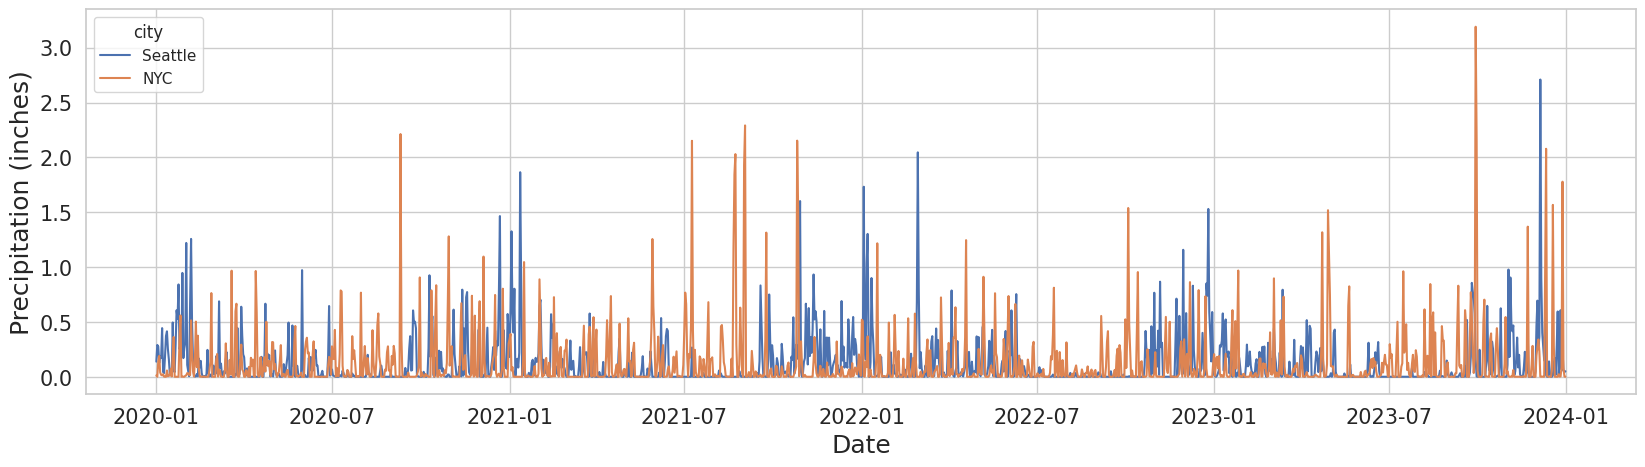

In [13]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

It seems that NYC has more intense rainfall events than Seattle, possibly driving up it's average rainfall.

When it rains in Seattle you can expect a consistent amount.

And when it rains in New York it's hard to know what you're in for. Perhaps the significant number of "rainy" days with a low amount of precipitation in NYC drives the narrative that it rains less often. It may just be less noticable than Seattle outside of those outlier days.

##### $\rightarrow$ Is there seasonality?

It's interesting to have a look at what the average day looks like, but does this change depending on the time of year? And is it significant when comparing the two?

Let's have a look at the average rainfall by month with a 95% confidence interval.

In [14]:
# creating a month column
df['month'] = df['date'].dt.month

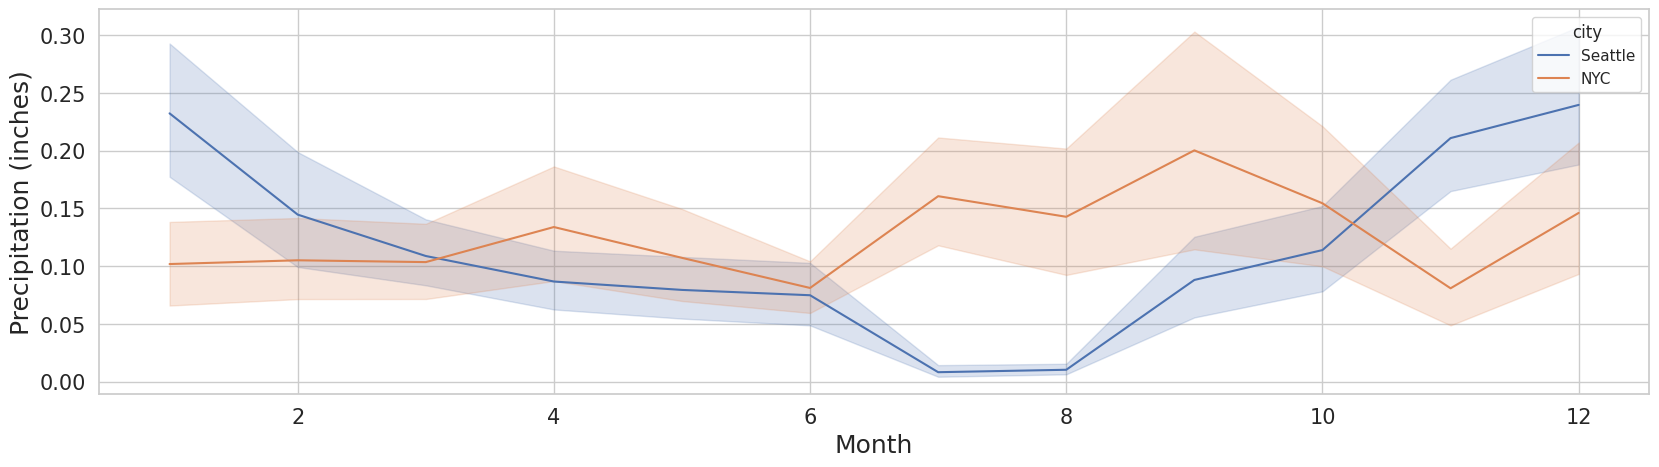

In [15]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city', errorbar="ci")

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

Yes, it appears so. Seattle experiences a lot of seasonality. In the winter months (Nov - Jan) Seattle gets a lot of rain, more than NYC. And in the summer (July - Aug) it gets close to none, with NYC seeing significantly more.

NYC on the other hand is generally consistent expcept for (Aug - Oct), where it sees its highest rainfall. September is an especially notable outlier, on average raining more than any month in either city.

Let's look at this more numerically for further analysis:


In [16]:
avg_precip_by_month = df.groupby(['city', 'month'])['precipitation'].mean().reset_index()

# Sort the DataFrame by average precipitation in descending order
avg_precip_by_month = avg_precip_by_month.sort_values(by=['city', 'precipitation'], ascending=[True, False])

# Print the DataFrame
print(avg_precip_by_month)

       city  month  precipitation
8       NYC      9       0.200270
6       NYC      7       0.160606
9       NYC     10       0.154460
11      NYC     12       0.146116
7       NYC      8       0.142773
3       NYC      4       0.133902
4       NYC      5       0.107225
1       NYC      2       0.105114
2       NYC      3       0.103539
0       NYC      1       0.101862
5       NYC      6       0.081161
10      NYC     11       0.080869
23  Seattle     12       0.239634
12  Seattle      1       0.232308
22  Seattle     11       0.210892
13  Seattle      2       0.144668
21  Seattle     10       0.113962
14  Seattle      3       0.108823
20  Seattle      9       0.088089
15  Seattle      4       0.086732
16  Seattle      5       0.079464
17  Seattle      6       0.074856
19  Seattle      8       0.010343
18  Seattle      7       0.008234


As talked about before, Seattle's winter months are consistently very rainy. They have higher avg precipitation than every NYC month except September. And the contrast to how dry Seattle's July and August is stark, having ~0.1in off from the next dryest month. We also see just how much more it rains in NYC in September.

So, which city is more rainy really depends on what time of year it is.

##### $\rightarrow$ Is this consistent year-over-year?

Having looked at seasonality, let's also take a look at potential yearly nuances.

In [17]:
avg_precip_by_year = df.groupby(['city', 'year'])['precipitation'].sum().reset_index()

# Sort the DataFrame by average precipitation in descending order
avg_precip_by_year = avg_precip_by_year.sort_values(by=['city', 'precipitation'], ascending=[True, False])

# Print the DataFrame
print(avg_precip_by_year)

      city  year  precipitation
3      NYC  2023      51.892048
1      NYC  2021      49.889667
0      NYC  2020      43.769333
2      NYC  2022      39.526881
4  Seattle  2020      44.382333
5  Seattle  2021      44.106333
6  Seattle  2022      42.404500
7  Seattle  2023      38.814833


NYC only had higher precipitation for 2 of the 4 years in the sample. In those 2 cases it was by a significant amount. As observed previously, NYC appears to be more volatile, whereas Seattle is more consistently within the 38-44in range.

##### $\rightarrow$ Qualitative analysis

Weather patterns are the likely cause of this unpredictability, the East coast of the US sees more tropical storms whereas the West coast generally doesn't experience these.

Let's do a bit of investigating to explore this hypothesis.

In [18]:
df_sorted_by_precip = df.sort_values(by='precipitation', ascending=False)

# Print the sorted DataFrame
print(df_sorted_by_precip)

           date     city  precipitation  year  log_precip  month
2828 2023-09-29      NYC       3.191429  2023    1.160469      9
1434 2023-12-05  Seattle       2.710000  2023    0.996949     12
2071 2021-09-02      NYC       2.291667  2021    0.829279      9
1714 2020-09-10      NYC       2.212857  2020    0.794285      9
2829 2023-09-30      NYC       2.175714  2023    0.777357      9
...         ...      ...            ...   ...         ...    ...
940  2022-07-29  Seattle       0.000000  2022        -inf      7
2081 2021-09-12      NYC       0.000000  2021        -inf      9
941  2022-07-30  Seattle       0.000000  2022        -inf      7
2921 2023-12-31      NYC       0.000000  2023        -inf     12
1424 2023-11-25  Seattle            NaN  2023         NaN     11

[2922 rows x 6 columns]


The highest rainfall in NYC came on September 29th from Tropical Storm Ophelia. The second, from Hurricane Ida. The fourth, also Tropical Storm Ophelia. The significance of September is starting to make more sense.

It could be helpful to go back further in the data or news to see if these occurences are consistent. But it's become a lot clearer how NYC's rain is observed, and why it's consistently inconsistent.

Going forward this also may become increasingly relevant, with climate change causing more extreme storms. NY may become even more rainy and extreme than we've observed.

On the other hand, the Pacific Northwest has seen more extreme droughts and wildfires. The summer generally has low precipitation, so it may be difficult to pull from this data with the limited scope. But should also be considered when looking at the continuing effects of climate change.

### Results for communication assignment

https://github.com/danielmrios/Methodologies-of-Data-Science/blob/main/Seattle-Weather/Weather_Project_Write-Up.pdf.

## Conclusion

To conclude my findings, NYC receives more rainfall than Seattle, but there exist nuanced differences in how each city experiences precipitation essential to the human experience. NYC exhibits more variability in rainfall and Seattle more consistency, both in average daily rainfall and yearly trends. Seasonal and yearly trends play a prominent role, with both Seattle and NYC seeing significant changes in rainfall and flip flopping in which is the rainier city at different times. Extreme weather events such as tropical storms and droughts contribute to the variability and are likely to become more significant as climate change becomes more extreme. Whether Seattle or NYC is rainier depends on various factors and perspectives.